# More basic statistics: demo

The sample input dataset is taken from Conway & Myles Machine Learning for Hackers book, Chapter 2.

Each sample contains three columns.
* Height in inches
* Weight in pounds
* IsMale: 1 corresponds to a male person, and 0 corresponds to a female person.

We want to collect different basic statistics for this dataset.

In [1]:
 data_file = "height_weight_gender.csv"

In [11]:
import pandas as pd

data = pd.read_csv(data_file)
print(data.columns)
print(data.dtypes)

Index(['Height', 'Weight', 'IsMale'], dtype='object')
Height    float64
Weight    float64
IsMale      int64
dtype: object


In [12]:
data.describe()

,Height,Weight,IsMale
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,0.500000
std,3.847528,32.108439,0.500025
min,54.263133,64.700127,0.000000
25%,63.505620,135.818051,0.000000
50%,66.318070,161.212928,0.500000
75%,69.174262,187.169525,1.000000
max,78.998742,269.989698,1.000000


## Bar charts

We use these charts to compare frequencies or counts: for example the count of data points in different categories. They are  often used for displaying nominal(categorical) data: data that has no inherent order or structure, such as hair color or preferred drink.

In our dataset we have two categories: Male and Female. 

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

How many total observations in each category? Using frequency counts for each.

Text(0, 0.5, 'Count')

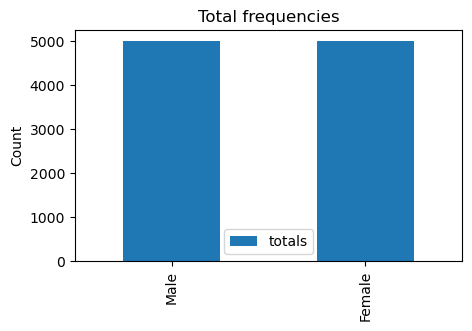

In [67]:
# create data for the plot
plotdata = pd.DataFrame({
    "totals":[m_height.count(), w_height.count()]},
    index=["Male", "Female"])
plotdata.plot(kind='bar', figsize=(5, 3))

plt.title("Total frequencies")
plt.ylabel("Count")

What is the mean height and mean weight of men and women in the dataset?

We will also compute the mean BMI index:  

$BMI = weight (lb) / height (in)^2 \times 703$

Text(0, 0.5, 'Mean values')

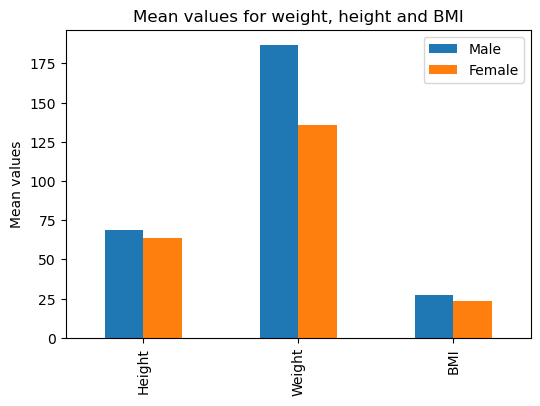

In [74]:
# create data for the plot
male_height_mean = data[data["IsMale"]==1]["Height"].mean()
male_weight_mean = data[data["IsMale"]==1]["Weight"].mean()

fem_height_mean = data[data["IsMale"]==0]["Height"].mean()
fem_weight_mean = data[data["IsMale"]==0]["Weight"].mean()

male_BMI_mean = male_weight_mean/(male_height_mean)**2 * 703
fem_BMI_mean = fem_weight_mean/(fem_height_mean)**2 * 703

plotdata = pd.DataFrame({
    "Male":[male_height_mean, male_weight_mean, male_BMI_mean],
    "Female":[fem_height_mean,fem_weight_mean, fem_BMI_mean]},
index=["Height", "Weight", "BMI"])
plotdata.plot(kind='bar', figsize=(6, 4))

plt.title("Mean values for weight, height and BMI")
plt.ylabel("Mean values")

## Mode

The mode of a set of values is the value that appears most often. It can be multiple values. 

Because the values of height and weight are continuous, the mode is not directly applicable here:

In [103]:
data["Height"].mode()

0       54.263133
1       54.616858
2       54.873728
3       55.148557
4       55.336492
          ...    
9995    78.095867
9996    78.462053
9997    78.528210
9998    78.621374
9999    78.998742
Name: Height, Length: 10000, dtype: float64

That means that each value occurs only once, and every one of them is a mode value.

In [105]:
# we convert the float into int
int_height = data["Height"].astype('int32')
int_height.dtype

dtype('int32')

In [106]:
# check that this did not harm the original dataset
data["Height"].dtype

dtype('float64')

In [114]:
# now compute basic statistics
print("MEAN of the int_height:")
print(int_height.mean())

print("MEDIAN of the int_height:")
print(int_height.median())

print("MODE of the int_height:")
print(int_height.mode())

MEAN of the int_height:
65.8662
MEDIAN of the int_height:
66.0
MODE of the int_height:
0    67
Name: Height, dtype: int32


## Histogram
A histogram divides the values within a numerical variable into “bins”, and counts the frequency of observations that fall into each bin. It is commonly used to obtain a very immediate and intuitive sense of the distribution of values within a variable.

Text(0, 0.5, 'Frequency')

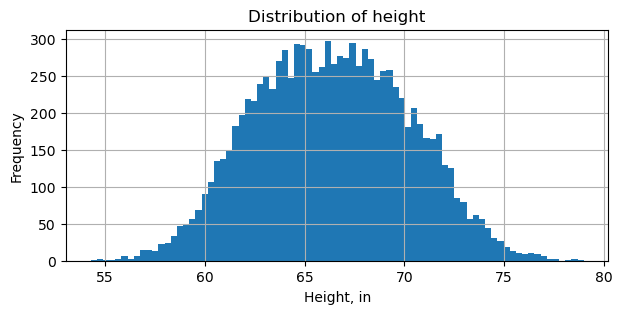

In [112]:
# plot one column of data
data.hist(column="Height", bins=80, figsize=(7, 3))

plt.title("Distribution of height")
plt.xlabel("Height, in")
plt.ylabel("Frequency")

This distribution is **unimodal**.

Text(0, 0.5, 'Frequency')

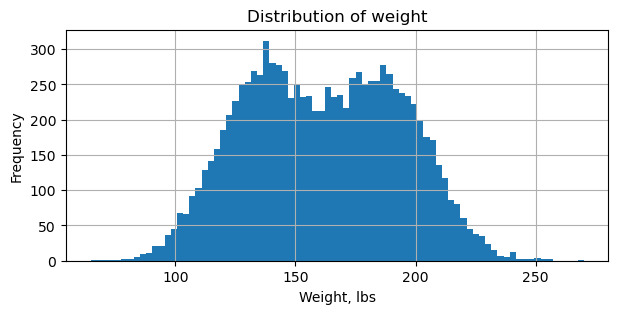

In [125]:
# plot one column of data
data.hist(column="Weight", bins=80, figsize=(7, 3))

plt.title("Distribution of weight")
plt.xlabel("Weight, lbs")
plt.ylabel("Frequency")

This distribution is **bimodal**.

## Normal Distribution

## Probability and Density

## Scatterplot

## Corelation. Heat map

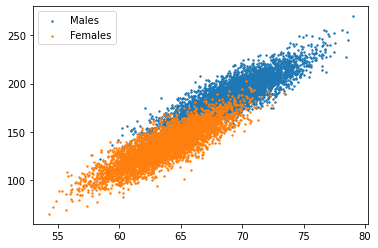

In [63]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target value, class, last column of the data frame
Y = data.iloc[:, -1]

# all males
males = data.loc[Y == 1]

# all females
females = data.loc[Y == 0]

import matplotlib.pyplot as plt
%matplotlib inline

# plot
plt.scatter(males.iloc[:, 0], males.iloc[:, 1], s=2, label='Males')
plt.scatter(females.iloc[:, 0], females.iloc[:, 1], s=2, label='Females')
plt.legend()
plt.show()

Copyright &copy; 2024 Marina Barsky. All rights reserved.